In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [16]:
def loadData(path):
    scalor = MinMaxScaler(feature_range=(0, 1))
    df = pd.read_csv(path)
    X = df.iloc[:, 3:-1]
    columns = X.columns
    X = scalor.fit_transform(X)
    X = pd.DataFrame(X, columns=columns)
    y = df.iloc[:, 2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [17]:
def train_rf(dataPath, para, output=None, flg=False):
    X_train, X_test, y_train, y_test = loadData(path=dataPath)
    lgbmCls = RandomForestRegressor(n_estimators=para)
    lgbmCls.fit(X_train, y_train)
    y_prd = lgbmCls.predict(X_test)

    r2 = r2_score(y_test, y_prd)
    mse = mean_squared_error(y_test, y_prd)
    rmse = root_mean_squared_error(y_test, y_prd)
    print(f'r2:{r2}, mse:{mse}, rmse:{rmse}')
    # joblib.dump(lgbmCls, output)
    if flg:
        joblib.dump(lgbmCls, output)
    return r2

In [19]:
def tunePara():
    trees = range(1, 200)
    rec = []
    for num in tqdm(trees):
        r2 = train_rf(dataPath=r'data\dataset.csv', para=num)
        rec.append([num, r2])
    df = pd.DataFrame(rec, columns=['num', 'r2'])
    return df
trees = tunePara()
trees

  1%|          | 2/199 [00:00<00:14, 13.32it/s]

r2:0.6489979749623833, mse:0.0004051568873893099, rmse:0.020128509318608517
r2:0.7220785658142677, mse:0.000320800950368867, rmse:0.017910917072245826


  2%|▏         | 4/199 [00:00<00:23,  8.30it/s]

r2:0.7240537582176867, mse:0.0003185210125078858, rmse:0.01784715698669919
r2:0.7523198313401558, mse:0.0002858938668274845, rmse:0.01690839634109292


  3%|▎         | 5/199 [00:00<00:26,  7.26it/s]

r2:0.7988109430619175, mse:0.00023222980573142968, rmse:0.01523908808726525


  3%|▎         | 6/199 [00:00<00:33,  5.77it/s]

r2:0.7848597679942153, mse:0.00024833345831077816, rmse:0.01575859950347042


  4%|▎         | 7/199 [00:01<00:37,  5.09it/s]

r2:0.8046875123755349, mse:0.00022544656130035382, rmse:0.015014877998184128


  4%|▍         | 8/199 [00:01<00:43,  4.35it/s]

r2:0.7985550409575242, mse:0.00023252519006740683, rmse:0.01524877667445513


  5%|▍         | 9/199 [00:01<00:47,  3.98it/s]

r2:0.8064633232650397, mse:0.00022339676682265334, rmse:0.014946463355009884


  5%|▌         | 10/199 [00:02<00:54,  3.46it/s]

r2:0.8024184622529007, mse:0.00022806569514984736, rmse:0.015101844097654013


  6%|▌         | 11/199 [00:02<01:00,  3.11it/s]

r2:0.8105057757568894, mse:0.00021873061861783465, rmse:0.014789544232931407


  6%|▌         | 12/199 [00:02<01:07,  2.78it/s]

r2:0.8097918029177977, mse:0.00021955474780380126, rmse:0.014817379923718


  7%|▋         | 13/199 [00:03<01:13,  2.53it/s]

r2:0.824940330295801, mse:0.00020206900765644515, rmse:0.014215097877132087


  7%|▋         | 14/199 [00:03<01:21,  2.28it/s]

r2:0.8215044948482129, mse:0.00020603494601642333, rmse:0.014353917444949422


  8%|▊         | 15/199 [00:04<01:24,  2.17it/s]

r2:0.8041339436591606, mse:0.00022608553817821732, rmse:0.01503614106671713


  8%|▊         | 16/199 [00:05<01:33,  1.95it/s]

r2:0.8002415550376589, mse:0.00023057846968830819, rmse:0.015184810492340963


  9%|▊         | 17/199 [00:05<01:36,  1.88it/s]

r2:0.8036504918753233, mse:0.00022664358002974597, rmse:0.0150546863145582


  9%|▉         | 18/199 [00:06<01:42,  1.76it/s]

r2:0.793664111883687, mse:0.0002381707233083771, rmse:0.015432780802835796


 10%|▉         | 19/199 [00:07<01:46,  1.69it/s]

r2:0.803704090898481, mse:0.0002265817114026708, rmse:0.015052631378023937


 10%|█         | 20/199 [00:07<01:51,  1.60it/s]

r2:0.8045186439328311, mse:0.00022564148385846962, rmse:0.015021367576171939


 11%|█         | 21/199 [00:08<01:56,  1.53it/s]

r2:0.8117677222513275, mse:0.00021727397085723088, rmse:0.014740216106191622


 11%|█         | 22/199 [00:09<02:01,  1.45it/s]

r2:0.8134927124515892, mse:0.00021528283801336724, rmse:0.014672519824943745


 12%|█▏        | 23/199 [00:10<02:08,  1.37it/s]

r2:0.8113516522041402, mse:0.00021775423488202194, rmse:0.014756498056179249


 12%|█▏        | 24/199 [00:10<02:12,  1.32it/s]

r2:0.8106719696139508, mse:0.00021853878329773077, rmse:0.014783057305501146


 13%|█▎        | 25/199 [00:11<02:17,  1.27it/s]

r2:0.8032004874354042, mse:0.00022716301406483302, rmse:0.015071928014186938


 13%|█▎        | 26/199 [00:12<02:20,  1.23it/s]

r2:0.815338940579313, mse:0.00021315176187054725, rmse:0.01459971786955307


 14%|█▎        | 27/199 [00:13<02:24,  1.19it/s]

r2:0.799900398238534, mse:0.00023097226236466195, rmse:0.015197771624967325


 14%|█▍        | 28/199 [00:14<02:31,  1.13it/s]

r2:0.8139125351168588, mse:0.00021479824239230806, rmse:0.014655996806505795


 15%|█▍        | 29/199 [00:15<02:34,  1.10it/s]

r2:0.811480910292442, mse:0.0002176050340199454, rmse:0.014751441760721065


 15%|█▌        | 30/199 [00:16<02:42,  1.04it/s]

r2:0.821350274146716, mse:0.00020621296088509173, rmse:0.014360117021984595


 16%|█▌        | 31/199 [00:17<02:45,  1.02it/s]

r2:0.8116107382570197, mse:0.0002174551753573955, rmse:0.014746361427735166


 16%|█▌        | 32/199 [00:18<02:50,  1.02s/it]

r2:0.8197397999624293, mse:0.0002080719094414613, rmse:0.014424697897753745


 17%|█▋        | 33/199 [00:19<02:55,  1.06s/it]

r2:0.8190909406407121, mse:0.00020882087897550409, rmse:0.014450635936715868


 17%|█▋        | 34/199 [00:20<02:59,  1.09s/it]

r2:0.8159552591302611, mse:0.00021244035370782886, rmse:0.014575333742588155


 18%|█▊        | 35/199 [00:22<03:03,  1.12s/it]

r2:0.8133256454591897, mse:0.00021547568118177583, rmse:0.014679089930297989


 18%|█▊        | 36/199 [00:23<03:09,  1.16s/it]

r2:0.8132887623537339, mse:0.00021551825485126416, rmse:0.014680540005437953


 19%|█▊        | 37/199 [00:24<03:14,  1.20s/it]

r2:0.8073813470952952, mse:0.00022233710433900903, rmse:0.014910972615460368


 19%|█▉        | 38/199 [00:26<03:17,  1.23s/it]

r2:0.798163578648589, mse:0.00023297704971294984, rmse:0.015263585742313299


 20%|█▉        | 39/199 [00:27<03:21,  1.26s/it]

r2:0.80865293011044, mse:0.00022086933327296465, rmse:0.014861673299900138


 20%|██        | 40/199 [00:28<03:23,  1.28s/it]

r2:0.8139773523368613, mse:0.00021472342475243087, rmse:0.01465344412595315


 21%|██        | 41/199 [00:30<03:25,  1.30s/it]

r2:0.8061002826983563, mse:0.00022381581963574674, rmse:0.01496047524765663


 21%|██        | 42/199 [00:31<03:31,  1.35s/it]

r2:0.8114776432720106, mse:0.0002176088050974167, rmse:0.01475156958080789


 22%|██▏       | 43/199 [00:32<03:34,  1.37s/it]

r2:0.8138307132847856, mse:0.0002148926882257751, rmse:0.014659218540760455


 22%|██▏       | 44/199 [00:34<03:37,  1.40s/it]

r2:0.802830108532397, mse:0.00022759053742023522, rmse:0.01508610411671069


 23%|██▎       | 45/199 [00:35<03:45,  1.46s/it]

r2:0.813415596779814, mse:0.00021537185158969065, rmse:0.01467555285465221


 23%|██▎       | 46/199 [00:37<03:51,  1.51s/it]

r2:0.8144014281511345, mse:0.00021423391977903484, rmse:0.014636731868113005


 24%|██▎       | 47/199 [00:39<03:55,  1.55s/it]

r2:0.811874873185205, mse:0.0002171502879843301, rmse:0.014736020086316729


 24%|██▍       | 48/199 [00:40<03:58,  1.58s/it]

r2:0.8191731577787318, mse:0.00020872597684573266, rmse:0.0144473518973455


 25%|██▍       | 49/199 [00:42<04:00,  1.60s/it]

r2:0.8176661862624545, mse:0.00021046545367312087, rmse:0.014507427534649996


 25%|██▌       | 50/199 [00:44<04:06,  1.65s/it]

r2:0.8124649357507875, mse:0.00021646918675019702, rmse:0.014712891855451021


 26%|██▌       | 51/199 [00:46<04:11,  1.70s/it]

r2:0.8134577034602404, mse:0.0002153232484183044, rmse:0.01467389683820574


 26%|██▌       | 52/199 [00:47<04:12,  1.72s/it]

r2:0.8192496127881476, mse:0.0002086377258630299, rmse:0.01444429734750119


 27%|██▋       | 53/199 [00:49<04:19,  1.78s/it]

r2:0.8093906765219319, mse:0.00022001776257410437, rmse:0.014832995738356577


 27%|██▋       | 54/199 [00:51<04:20,  1.80s/it]

r2:0.8141240838299546, mse:0.00021455405457567104, rmse:0.01464766379241656


 28%|██▊       | 55/199 [00:53<04:22,  1.83s/it]

r2:0.8111676646492656, mse:0.0002179666092267094, rmse:0.014763692262666186


 28%|██▊       | 56/199 [00:55<04:24,  1.85s/it]

r2:0.8168769879690979, mse:0.00021137641458291915, rmse:0.014538789997208128


 29%|██▊       | 57/199 [00:57<04:28,  1.89s/it]

r2:0.8216705542302182, mse:0.00020584326591905667, rmse:0.014347238965008448


 29%|██▉       | 58/199 [00:59<04:30,  1.92s/it]

r2:0.8197302436977532, mse:0.000208082940108452, rmse:0.014425080246170278


 30%|██▉       | 59/199 [01:01<04:31,  1.94s/it]

r2:0.8144591560509243, mse:0.00021416728524553926, rmse:0.01463445541335718


 30%|███       | 60/199 [01:03<04:36,  1.99s/it]

r2:0.8148024379725807, mse:0.0002137710395690067, rmse:0.014620911037586089


 31%|███       | 61/199 [01:05<04:41,  2.04s/it]

r2:0.8112128325001007, mse:0.0002179144725877472, rmse:0.014761926452456914


 31%|███       | 62/199 [01:07<04:42,  2.06s/it]

r2:0.8152950538836587, mse:0.0002132024196894221, rmse:0.01460145265682227


 32%|███▏      | 63/199 [01:10<04:46,  2.11s/it]

r2:0.8145631933733234, mse:0.00021404719637223142, rmse:0.014630351888188863


 32%|███▏      | 64/199 [01:12<04:54,  2.18s/it]

r2:0.8155781714744624, mse:0.00021287562088578878, rmse:0.014590257738840283


 33%|███▎      | 65/199 [01:14<04:55,  2.21s/it]

r2:0.8171114142635717, mse:0.0002111058194836999, rmse:0.014529481046606582


 33%|███▎      | 66/199 [01:16<04:55,  2.22s/it]

r2:0.810087492019445, mse:0.0002192134378753316, rmse:0.014805858228259907


 34%|███▎      | 67/199 [01:19<04:55,  2.24s/it]

r2:0.8198213567411141, mse:0.00020797776955553353, rmse:0.014421434379268018


 34%|███▍      | 68/199 [01:21<04:59,  2.29s/it]

r2:0.8100923030734586, mse:0.00021920788454079165, rmse:0.014805670688651414


 35%|███▍      | 69/199 [01:24<05:07,  2.37s/it]

r2:0.8189308714641986, mse:0.00020900564465973676, rmse:0.014457027518122001


 35%|███▌      | 70/199 [01:26<05:05,  2.37s/it]

r2:0.8140135177085596, mse:0.00021468167955330565, rmse:0.014652019640763032


 36%|███▌      | 71/199 [01:28<05:02,  2.36s/it]

r2:0.8125603104582162, mse:0.00021635909701611826, rmse:0.014709150111958143


 36%|███▌      | 72/199 [01:31<05:01,  2.37s/it]

r2:0.8147095414107105, mse:0.00021387826881320398, rmse:0.014624577560162345


 37%|███▋      | 73/199 [01:33<05:02,  2.40s/it]

r2:0.8150805243810775, mse:0.00021345004819102315, rmse:0.014609929780495974


 37%|███▋      | 74/199 [01:36<05:02,  2.42s/it]

r2:0.8246289334473779, mse:0.0002024284488244454, rmse:0.014227735196595606


 38%|███▊      | 75/199 [01:38<05:01,  2.43s/it]

r2:0.8157350825360811, mse:0.00021269450057084035, rmse:0.014584049525794965


 38%|███▊      | 76/199 [01:41<05:03,  2.47s/it]

r2:0.814459138336807, mse:0.00021416730569270512, rmse:0.014634456111953908


 39%|███▊      | 77/199 [01:43<05:05,  2.50s/it]

r2:0.8144920566625593, mse:0.00021412930851477316, rmse:0.014633157844934673


 39%|███▉      | 78/199 [01:46<05:07,  2.54s/it]

r2:0.8183496393527113, mse:0.00020967655302021036, rmse:0.014480212464608741


 40%|███▉      | 79/199 [01:49<05:08,  2.57s/it]

r2:0.8138501196940366, mse:0.00021487028767020367, rmse:0.01465845447754311


 40%|████      | 80/199 [01:51<05:13,  2.64s/it]

r2:0.817442304075725, mse:0.00021072387785146422, rmse:0.014516331418490838


 41%|████      | 81/199 [01:54<05:13,  2.65s/it]

r2:0.8131779732332591, mse:0.00021564613723371867, rmse:0.014684894866280747


 41%|████      | 82/199 [01:57<05:18,  2.72s/it]

r2:0.8151678354618525, mse:0.00021334926619206583, rmse:0.014606480280754355


 42%|████▏     | 83/199 [02:00<05:18,  2.74s/it]

r2:0.8109992230385913, mse:0.0002181610390983899, rmse:0.014770275525473107


 42%|████▏     | 84/199 [02:02<05:16,  2.75s/it]

r2:0.8218655946728395, mse:0.00020561813337562196, rmse:0.014339390969480606


 43%|████▎     | 85/199 [02:05<05:17,  2.79s/it]

r2:0.8169076945582773, mse:0.0002113409703825818, rmse:0.014537570993208659


 43%|████▎     | 86/199 [02:08<05:20,  2.83s/it]

r2:0.8139566885349486, mse:0.00021474727669933542, rmse:0.014654257971638667


 44%|████▎     | 87/199 [02:11<05:21,  2.87s/it]

r2:0.8129651508566982, mse:0.00021589179522285708, rmse:0.014693256794286864


 44%|████▍     | 88/199 [02:14<05:22,  2.90s/it]

r2:0.8201592282907237, mse:0.00020758776899823604, rmse:0.01440790647520437


 45%|████▍     | 89/199 [02:17<05:22,  2.93s/it]

r2:0.8178323605579362, mse:0.0002102736409326836, rmse:0.014500815181660775


 45%|████▌     | 90/199 [02:20<05:23,  2.96s/it]

r2:0.81397929554122, mse:0.00021472118173793706, rmse:0.01465336759035059


 46%|████▌     | 91/199 [02:23<05:22,  2.99s/it]

r2:0.8169548695200758, mse:0.00021128651696259663, rmse:0.01453569802116832


 46%|████▌     | 92/199 [02:26<05:22,  3.01s/it]

r2:0.8203406599128211, mse:0.00020737834493216376, rmse:0.014400636962723689


 47%|████▋     | 93/199 [02:29<05:22,  3.05s/it]

r2:0.8155667603607497, mse:0.0002128887925799207, rmse:0.014590709118474012


 47%|████▋     | 94/199 [02:33<05:25,  3.10s/it]

r2:0.8171214402040436, mse:0.0002110942466762942, rmse:0.014529082788541547


 48%|████▊     | 95/199 [02:36<05:26,  3.14s/it]

r2:0.816762083455223, mse:0.00021150904730828175, rmse:0.014543350621788699


 48%|████▊     | 96/199 [02:39<05:25,  3.16s/it]

r2:0.8171202574363272, mse:0.00021109561192906296, rmse:0.014529129771912114


 49%|████▊     | 97/199 [02:42<05:27,  3.21s/it]

r2:0.8137070127617547, mse:0.00021503547406546993, rmse:0.014664087904314742


 49%|████▉     | 98/199 [02:46<05:27,  3.24s/it]

r2:0.8138522716781824, mse:0.00021486780366402694, rmse:0.014658369747827586


 50%|████▉     | 99/199 [02:49<05:24,  3.25s/it]

r2:0.8181416414599281, mse:0.00020991664217301386, rmse:0.014488500342444482


 50%|█████     | 100/199 [02:52<05:24,  3.28s/it]

r2:0.8152821261124216, mse:0.00021321734204080969, rmse:0.0146019636364706


 51%|█████     | 101/199 [02:56<05:25,  3.32s/it]

r2:0.8114415771439343, mse:0.0002176504357409722, rmse:0.014752980571429361


 51%|█████▏    | 102/199 [02:59<05:28,  3.39s/it]

r2:0.814105491234502, mse:0.00021457551575698825, rmse:0.014648396354447413


 52%|█████▏    | 103/199 [03:03<05:28,  3.42s/it]

r2:0.8183493695434965, mse:0.00020967686445733585, rmse:0.014480223218491345


 52%|█████▏    | 104/199 [03:06<05:27,  3.45s/it]

r2:0.8157027085171394, mse:0.00021273186946278694, rmse:0.014585330625761863


 53%|█████▎    | 105/199 [03:10<05:26,  3.48s/it]

r2:0.8140033978555988, mse:0.00021469336076262622, rmse:0.0146524182564731


 53%|█████▎    | 106/199 [03:13<05:24,  3.48s/it]

r2:0.8196885030154821, mse:0.00020813112081312054, rmse:0.014426750181975168


 54%|█████▍    | 107/199 [03:17<05:25,  3.54s/it]

r2:0.8175114154836177, mse:0.0002106441034886187, rmse:0.01451358341308647


 54%|█████▍    | 108/199 [03:21<05:23,  3.55s/it]

r2:0.8169258648113493, mse:0.0002113199967053588, rmse:0.01453684961418253


 55%|█████▍    | 109/199 [03:24<05:23,  3.60s/it]

r2:0.8165844066755622, mse:0.0002117141372105438, rmse:0.014550399898646902


 55%|█████▌    | 110/199 [03:28<05:22,  3.62s/it]

r2:0.8169239224584338, mse:0.0002113222387370433, rmse:0.014536926729437804


 56%|█████▌    | 111/199 [03:32<05:19,  3.64s/it]

r2:0.8144318137880917, mse:0.00021419884604950395, rmse:0.014635533678329054


 56%|█████▋    | 112/199 [03:35<05:18,  3.66s/it]

r2:0.817241298536603, mse:0.00021095589582506417, rmse:0.014524320838685167


 57%|█████▋    | 113/199 [03:39<05:17,  3.69s/it]

r2:0.8153849453975406, mse:0.00021309865913145048, rmse:0.014597899134171687


 57%|█████▋    | 114/199 [03:43<05:17,  3.73s/it]

r2:0.8204902089393145, mse:0.00020720572251472995, rmse:0.014394642146115685


 58%|█████▊    | 115/199 [03:47<05:17,  3.78s/it]

r2:0.813713305728928, mse:0.00021502821017862464, rmse:0.014663840226169428


 58%|█████▊    | 116/199 [03:51<05:17,  3.82s/it]

r2:0.8155383481851083, mse:0.00021292158836976155, rmse:0.014591832933862748


 59%|█████▉    | 117/199 [03:55<05:20,  3.91s/it]

r2:0.815118538975188, mse:0.00021340616845949307, rmse:0.014608427994123567


 59%|█████▉    | 118/199 [03:59<05:18,  3.93s/it]

r2:0.8185035622148615, mse:0.00020949888194346896, rmse:0.014474076203456612


 60%|█████▉    | 119/199 [04:03<05:17,  3.97s/it]

r2:0.8180851964241554, mse:0.00020998179591393543, rmse:0.014490748631935323


 60%|██████    | 120/199 [04:07<05:16,  4.01s/it]

r2:0.8163195280082176, mse:0.00021201988307165568, rmse:0.014560902550036371


 61%|██████    | 121/199 [04:11<05:14,  4.03s/it]

r2:0.8188904195176319, mse:0.00020905233779422252, rmse:0.0144586423219548


 61%|██████▏   | 122/199 [04:15<05:10,  4.03s/it]

r2:0.8185199981954719, mse:0.00020947991011347863, rmse:0.014473420815877587


 62%|██████▏   | 123/199 [04:19<05:09,  4.07s/it]

r2:0.8165538935076058, mse:0.00021174935814738112, rmse:0.01455161015652155


 62%|██████▏   | 124/199 [04:24<05:09,  4.13s/it]

r2:0.8154076839346749, mse:0.00021307241234575717, rmse:0.014597000114604273


 63%|██████▎   | 125/199 [04:28<05:05,  4.13s/it]

r2:0.8184829163525091, mse:0.00020952271318298182, rmse:0.01447489941875182


 63%|██████▎   | 126/199 [04:32<05:03,  4.16s/it]

r2:0.8195990556789966, mse:0.0002082343686631347, rmse:0.014430328085775967


 64%|██████▍   | 127/199 [04:36<05:01,  4.19s/it]

r2:0.813615273299625, mse:0.0002151413676850959, rmse:0.014667698104511693


 64%|██████▍   | 128/199 [04:41<04:59,  4.21s/it]

r2:0.8178363778126216, mse:0.00021026900386996578, rmse:0.014500655291053773


 65%|██████▍   | 129/199 [04:45<04:56,  4.23s/it]

r2:0.818540258945521, mse:0.0002094565234038858, rmse:0.014472612874111081


 65%|██████▌   | 130/199 [04:49<04:55,  4.28s/it]

r2:0.8160418212545757, mse:0.00021234043621917812, rmse:0.014571905716795525


 66%|██████▌   | 131/199 [04:54<04:55,  4.35s/it]

r2:0.8196609781648552, mse:0.0002081628923757054, rmse:0.014427851273689559


 66%|██████▋   | 132/199 [04:58<04:52,  4.37s/it]

r2:0.818993000436171, mse:0.00020893393002818065, rmse:0.014454547036423543


 67%|██████▋   | 133/199 [05:03<04:49,  4.39s/it]

r2:0.8161632525287068, mse:0.00021220026974277847, rmse:0.014567095446339962


 67%|██████▋   | 134/199 [05:07<04:47,  4.42s/it]

r2:0.8173642346449504, mse:0.0002108139923388935, rmse:0.014519434986902675


 68%|██████▊   | 135/199 [05:12<04:45,  4.47s/it]

r2:0.817579598598555, mse:0.00021056540064176885, rmse:0.014510871808467224


 68%|██████▊   | 136/199 [05:16<04:42,  4.49s/it]

r2:0.8145361667311006, mse:0.00021407839285959748, rmse:0.01463141800577092


 69%|██████▉   | 137/199 [05:21<04:39,  4.51s/it]

r2:0.8173130758174707, mse:0.00021087304428112072, rmse:0.014521468392732214


 69%|██████▉   | 138/199 [05:25<04:36,  4.53s/it]

r2:0.8189198261161096, mse:0.00020901839415555918, rmse:0.014457468455976627


 70%|██████▉   | 139/199 [05:30<04:32,  4.55s/it]

r2:0.8150813559054719, mse:0.00021344908837366767, rmse:0.014609896932342393


 70%|███████   | 140/199 [05:35<04:30,  4.58s/it]

r2:0.8185808559213139, mse:0.000209409662864127, rmse:0.014470993845072529


 71%|███████   | 141/199 [05:39<04:30,  4.67s/it]

r2:0.8124074886670987, mse:0.0002165354971414674, rmse:0.014715145162092946


 71%|███████▏  | 142/199 [05:44<04:30,  4.74s/it]

r2:0.8164874347693972, mse:0.00021182607056950884, rmse:0.014554245791847437


 72%|███████▏  | 143/199 [05:49<04:30,  4.83s/it]

r2:0.8127174537797911, mse:0.0002161777086066455, rmse:0.014702982983280825


 72%|███████▏  | 144/199 [05:54<04:28,  4.88s/it]

r2:0.8144862461246134, mse:0.00021413601554009002, rmse:0.01463338701531843


 73%|███████▎  | 145/199 [05:59<04:24,  4.90s/it]

r2:0.8222789757742536, mse:0.00020514097316454746, rmse:0.014322743213663626


 73%|███████▎  | 146/199 [06:04<04:22,  4.95s/it]

r2:0.8187796960328193, mse:0.00020918014441432024, rmse:0.014463061377672441


 74%|███████▍  | 147/199 [06:09<04:16,  4.94s/it]

r2:0.8157000289840735, mse:0.00021273496241154294, rmse:0.014585436654812324


 74%|███████▍  | 148/199 [06:15<04:20,  5.11s/it]

r2:0.8182092261853161, mse:0.00020983863003912282, rmse:0.01448580788355012


 75%|███████▍  | 149/199 [06:20<04:17,  5.16s/it]

r2:0.8133434802487218, mse:0.00021545509472557713, rmse:0.0146783886965013


 75%|███████▌  | 150/199 [06:25<04:15,  5.21s/it]

r2:0.8169937175874273, mse:0.00021124167516418376, rmse:0.01453415546786891


 76%|███████▌  | 151/199 [06:31<04:10,  5.22s/it]

r2:0.8174361902922581, mse:0.0002107309349089823, rmse:0.014516574489492427


 76%|███████▋  | 152/199 [06:36<04:04,  5.19s/it]

r2:0.8176274599058986, mse:0.00021051015498240944, rmse:0.014508968088131197


 77%|███████▋  | 153/199 [06:41<03:58,  5.18s/it]

r2:0.8143167225041786, mse:0.00021433169436099408, rmse:0.014640071528547738


 77%|███████▋  | 154/199 [06:46<03:54,  5.20s/it]

r2:0.8178391957533376, mse:0.0002102657511591325, rmse:0.014500543133246164


 78%|███████▊  | 155/199 [06:51<03:49,  5.22s/it]

r2:0.8199205891082111, mse:0.00020786322697710548, rmse:0.014417462570685088


 78%|███████▊  | 156/199 [06:57<03:44,  5.22s/it]

r2:0.8193369867406921, mse:0.0002085368712920398, rmse:0.014440805770179163


 79%|███████▉  | 157/199 [07:02<03:39,  5.22s/it]

r2:0.8160990126138917, mse:0.00021227442100709042, rmse:0.01456964038702021


 79%|███████▉  | 158/199 [07:07<03:34,  5.24s/it]

r2:0.8182630728066927, mse:0.00020977647561277432, rmse:0.014483662368778634


 80%|███████▉  | 159/199 [07:12<03:30,  5.26s/it]

r2:0.8177155063497351, mse:0.0002104085241638217, rmse:0.014505465320485989


 80%|████████  | 160/199 [07:18<03:26,  5.29s/it]

r2:0.8185263499447779, mse:0.00020947257837521303, rmse:0.014473167530821061


 81%|████████  | 161/199 [07:23<03:22,  5.33s/it]

r2:0.8162846143964214, mse:0.000212060183381266, rmse:0.0145622863377035


 81%|████████▏ | 162/199 [07:29<03:17,  5.33s/it]

r2:0.8188824338840134, mse:0.00020906155550303864, rmse:0.014458961079657094


 82%|████████▏ | 163/199 [07:34<03:13,  5.38s/it]

r2:0.8153100888544231, mse:0.0002131850650261371, rmse:0.014600858366073452


 82%|████████▏ | 164/199 [07:40<03:09,  5.42s/it]

r2:0.8179635101146793, mse:0.00021012225677418252, rmse:0.014495594391889645


 83%|████████▎ | 165/199 [07:45<03:05,  5.46s/it]

r2:0.8155619926392316, mse:0.00021289429589634758, rmse:0.014590897707007187


 83%|████████▎ | 166/199 [07:51<03:01,  5.51s/it]

r2:0.8188122503918314, mse:0.0002091425673582709, rmse:0.014461762249403456


 84%|████████▍ | 167/199 [07:56<02:58,  5.57s/it]

r2:0.8177584870031234, mse:0.00021035891217727304, rmse:0.014503755106084528


 84%|████████▍ | 168/199 [08:02<02:52,  5.57s/it]

r2:0.8135549235062737, mse:0.00021521102863484732, rmse:0.014670072550428894


 85%|████████▍ | 169/199 [08:08<02:48,  5.60s/it]

r2:0.820207071645034, mse:0.00020753254406181992, rmse:0.014405989867475957


 85%|████████▌ | 170/199 [08:13<02:42,  5.62s/it]

r2:0.8145604256226836, mse:0.00021405039114933896, rmse:0.014630461070975822


 86%|████████▌ | 171/199 [08:19<02:38,  5.65s/it]

r2:0.8178388001325865, mse:0.00021026620781881163, rmse:0.014500558879533287


 86%|████████▋ | 172/199 [08:25<02:33,  5.67s/it]

r2:0.8142772574841624, mse:0.00021437724829951867, rmse:0.014641627242199504


 87%|████████▋ | 173/199 [08:31<02:28,  5.72s/it]

r2:0.8151824118367365, mse:0.00021333244087979935, rmse:0.014605904315714223


 87%|████████▋ | 174/199 [08:36<02:23,  5.73s/it]

r2:0.8174647595407698, mse:0.00021069795781205298, rmse:0.01451543860212474


 88%|████████▊ | 175/199 [08:42<02:18,  5.77s/it]

r2:0.8188730714232492, mse:0.00020907236246479663, rmse:0.014459334786386151


 88%|████████▊ | 176/199 [08:48<02:12,  5.78s/it]

r2:0.8131494596405857, mse:0.00021567905008786713, rmse:0.014686015459881116


 89%|████████▉ | 177/199 [08:54<02:05,  5.72s/it]

r2:0.8160044041933981, mse:0.0002123836262265301, rmse:0.014573387602974474


 89%|████████▉ | 178/199 [08:59<01:57,  5.59s/it]

r2:0.816033229375535, mse:0.0002123503537088809, rmse:0.014572246007698363


 90%|████████▉ | 179/199 [09:04<01:49,  5.49s/it]

r2:0.8154946007376522, mse:0.00021297208545632566, rmse:0.014593563151483111


 90%|█████████ | 180/199 [09:10<01:43,  5.45s/it]

r2:0.8164844949289998, mse:0.00021182946398749471, rmse:0.014554362369664111


 91%|█████████ | 181/199 [09:15<01:38,  5.48s/it]

r2:0.8179459965170992, mse:0.00021014247248285766, rmse:0.01449629168038701


 91%|█████████▏| 182/199 [09:21<01:32,  5.46s/it]

r2:0.8138090306926763, mse:0.00021491771614841625, rmse:0.014660072174052085


 92%|█████████▏| 183/199 [09:26<01:26,  5.43s/it]

r2:0.8160815405614558, mse:0.00021229458876076797, rmse:0.014570332486280743


 92%|█████████▏| 184/199 [09:32<01:26,  5.75s/it]

r2:0.8172023158093962, mse:0.0002110008930595257, rmse:0.014525869786678032


 93%|█████████▎| 185/199 [09:38<01:19,  5.70s/it]

r2:0.8150345500335663, mse:0.0002135031157581844, rmse:0.014611745814863616


 93%|█████████▎| 186/199 [09:44<01:15,  5.79s/it]

r2:0.8176670959365069, mse:0.00021046440364867278, rmse:0.014507391345402963


 94%|█████████▍| 187/199 [09:51<01:14,  6.19s/it]

r2:0.8169915489926695, mse:0.00021124417834376524, rmse:0.014534241581306031


 94%|█████████▍| 188/199 [09:58<01:11,  6.50s/it]

r2:0.8204235489366749, mse:0.00020728266725366675, rmse:0.014397314584799027


 95%|█████████▍| 189/199 [10:04<01:03,  6.33s/it]

r2:0.8162473118372274, mse:0.00021210324122052793, rmse:0.014563764665103866


 95%|█████████▌| 190/199 [10:10<00:54,  6.08s/it]

r2:0.8148202253950871, mse:0.00021375050778792476, rmse:0.01462020888318374


 96%|█████████▌| 191/199 [10:15<00:47,  5.97s/it]

r2:0.8189824455769271, mse:0.00020894611335936687, rmse:0.014454968466218349


 96%|█████████▋| 192/199 [10:21<00:41,  5.90s/it]

r2:0.8185487386743302, mse:0.00020944673536767755, rmse:0.01447227471297023


 97%|█████████▋| 193/199 [10:27<00:34,  5.80s/it]

r2:0.814057288800903, mse:0.00021463115517376803, rmse:0.014650295395444012


 97%|█████████▋| 194/199 [10:33<00:29,  5.96s/it]

r2:0.8159673032854947, mse:0.00021242645130243638, rmse:0.014574856819277381


 98%|█████████▊| 195/199 [10:39<00:23,  5.86s/it]

r2:0.815703727760236, mse:0.00021273069296427394, rmse:0.014585290294137925


 98%|█████████▊| 196/199 [10:44<00:17,  5.81s/it]

r2:0.817206246587735, mse:0.0002109963558152844, rmse:0.014525713607781354


 99%|█████████▉| 197/199 [10:51<00:12,  6.17s/it]

r2:0.8167594066212802, mse:0.00021151213714147633, rmse:0.014543456849782184


 99%|█████████▉| 198/199 [10:59<00:06,  6.62s/it]

r2:0.8169663052950265, mse:0.00021127331680233157, rmse:0.014535243954001308


100%|██████████| 199/199 [11:07<00:00,  3.35s/it]

r2:0.8165494297263269, mse:0.00021175451062970291, rmse:0.014551787197100667


,num,r2
0,1,0.648998
1,2,0.722079
2,3,0.724054
3,4,0.752320
4,5,0.798811
...,...,...
194,195,0.815704
195,196,0.817206
196,197,0.816759
197,198,0.816966


13
0.824940330295801


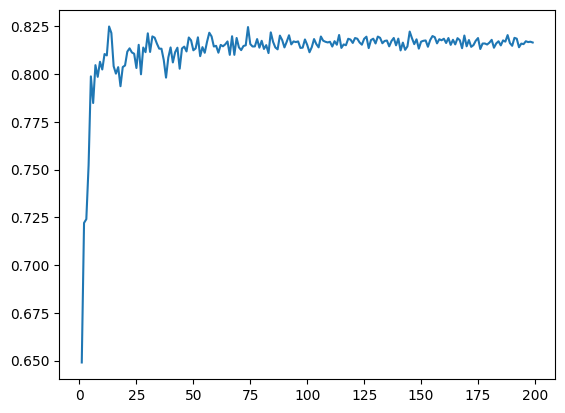

In [20]:
plt.plot(trees.iloc[:,0], trees.iloc[:,1])
idx = np.argmax(trees['r2'].values)
print(trees.iloc[idx, 0])
print(trees.iloc[idx, 1])
# print(idx)

In [169]:
def train_output(dataPath, output=None, flg=False):
    X_train, X_test, y_train, y_test = loadData(path=dataPath)
    lgbmCls = RandomForestRegressor(n_estimators=13)
    lgbmCls.fit(X_train, y_train)
    y_prd = lgbmCls.predict(X_test)

    r2 = r2_score(y_test, y_prd)
    mse = mean_squared_error(y_test, y_prd)
    rmse = root_mean_squared_error(y_test, y_prd)
    print(f'r2:{r2}, mse:{mse}, rmse:{rmse}')
    # joblib.dump(lgbmCls, output)
    if flg:
        joblib.dump(lgbmCls, output)
    return r2
train_output(dataPath=r'data\data.csv', output='rfV4.pkl', flg=True)

r2:0.7989868129088562, mse:0.00023202680154715558, rmse:0.015232425990207719


0.7989868129088562

In [171]:
while True:
    r2 = train_output(dataPath=r'data\dataset.csv', output='rfV4.pkl', flg=True)
    if r2>0.82:
        break

r2:0.804422250230741, mse:0.00022575274980429595, rmse:0.015025070708795215
r2:0.7968867007023457, mse:0.00023445093264630495, rmse:0.015311790641407847
r2:0.8093782733926316, mse:0.00022003207933840417, rmse:0.014833478329050276
r2:0.821944596122675, mse:0.0002055269430712036, rmse:0.014336210903554802
